In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import skimage
import cv2
from keras.preprocessing.image import ImageDataGenerator
from joblib import dump
from sklearn.decomposition import PCA

In [6]:
# Loading all samples from both categories
new_samples = []
processed_path = Path("data/processed/crop_6_1000x1000")
for category in ["dc", "marvel"]:
    print("loading category", category)
    new_samples.extend([cv2.resize(cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE), (img_width, img_height)) for img_path in (processed_path / category).iterdir()])
X_samples = np.array(new_samples)

loading category dc
loading category marvel


In [7]:
X_samples = np.array([sample.flatten() for sample in new_samples])
X_samples.shape

(6042, 65536)

In [9]:
# Implement the PCA with the maximum number of components
pca = PCA()
pca.fit(X_samples)

PCA()

In [10]:
pca.n_components_

6042

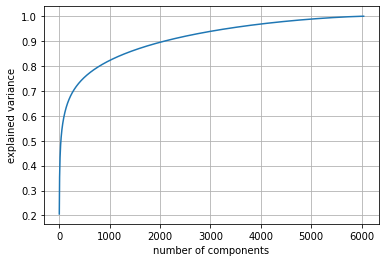

In [11]:
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.savefig("pca_cumulative_explained_variance.pdf")

In [12]:
# Dump the complete trained model for later use
dump(pca, "pca_model_256x256_grayscale.joblib")

['pca_model_256x256_grayscale.joblib']

In [13]:
# Find threshold for keepin 90% of the information
threshold = .9
components_90_variance = np.where(pca.explained_variance_ratio_.cumsum() >= threshold)[0][0]

In [14]:
# Number of components needed to keep 90%
components_90_variance

2086

In [15]:
# Get a PCA model with the 90% variance explained
PCA_clipped = PCA(n_components=components_90_variance)
PCA_clipped.fit(X_samples)

PCA(n_components=2086)

In [16]:
dump(PCA_clipped, "PCA_model_256x256_grayscale_2086_components.joblib")

['PCA_model_256x256_grayscale_2086_components.joblib']